## KNN algorithm 
### Dataset 1 

In [41]:
import nbimporter
from Helper import * 
%matplotlib inline
random_seed = 42

In [42]:
X_train, X_test, y_train, y_test = import_dataset1()

number of training samples:  24129
number of test samples:  6033


In [43]:
options=['uniform', 'distance']
k_range=list(range(3,20))
p_values = [1,2]
leaf_sizes = [10,20,30,40,50]

param_grid = dict(n_neighbors=k_range, weights=options, p=p_values, leaf_size=leaf_sizes)

knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_grid, cv=StratifiedKFold(5), scoring='roc_auc', random_state=random_seed)
rand.fit(X_train, y_train)

print('\nBest Score : %.2f'%rand.best_score_, ' Best Params : ', str(rand.best_params_))


Best Score : 0.86  Best Params :  {'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 20}


In [59]:
rand.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 20}

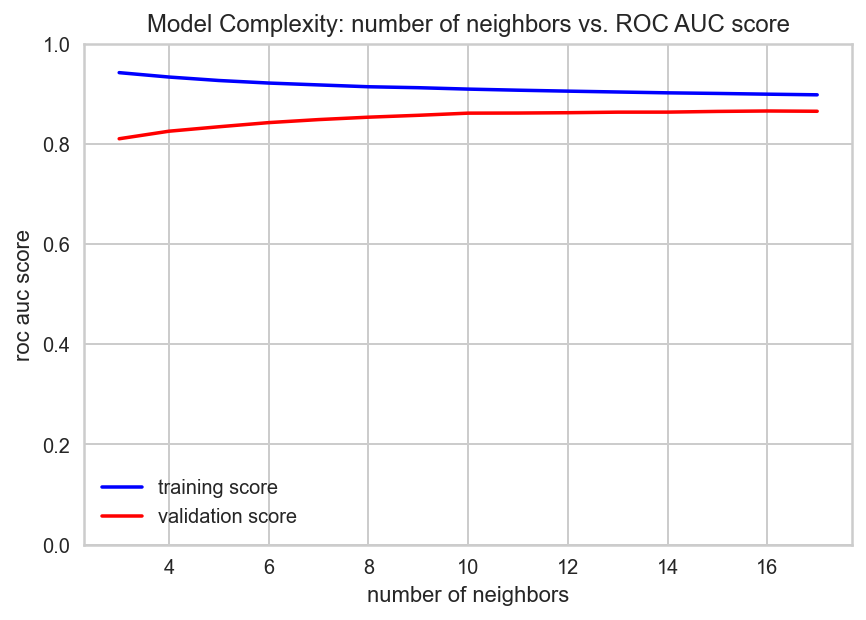

In [50]:
k_range=list(range(3,18))
train_score, val_score = validation_curve(KNeighborsClassifier(weights='uniform', p=1, leaf_size= 20), X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'n_neighbors', 
                                          param_range = k_range,
                                          cv=StratifiedKFold(5))

plt.plot(k_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(k_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity: number of neighbors vs. ROC AUC score')
plt.ylim(0, 1)
plt.xlabel('number of neighbors')
plt.ylabel('roc auc score');

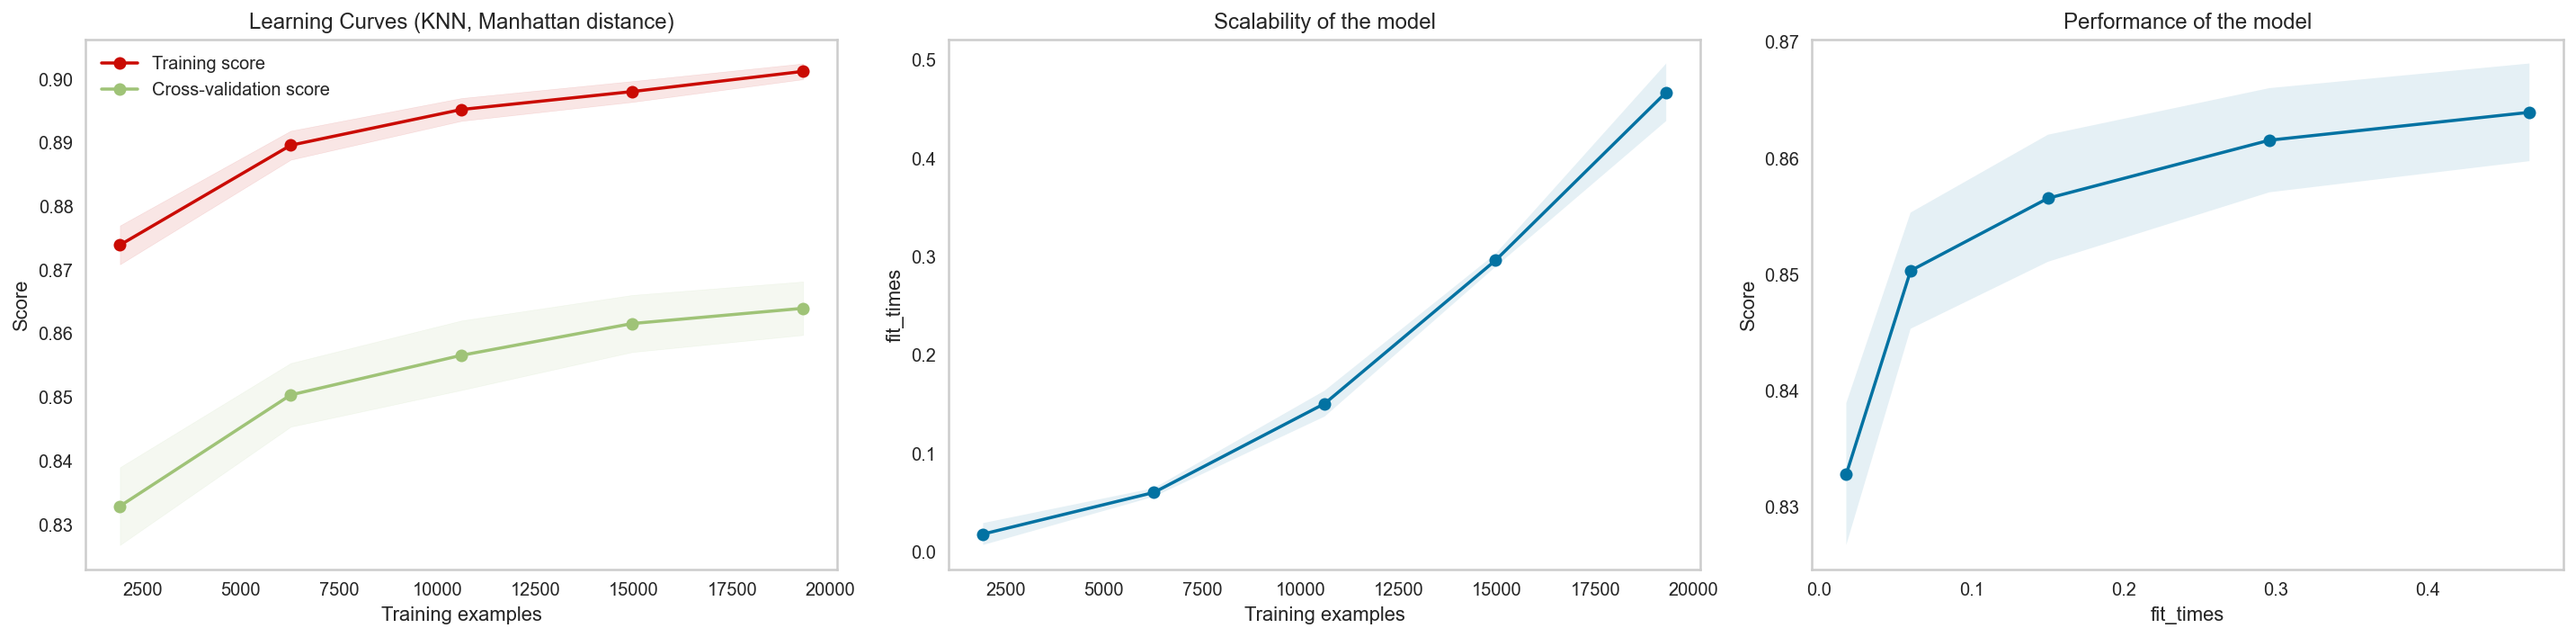

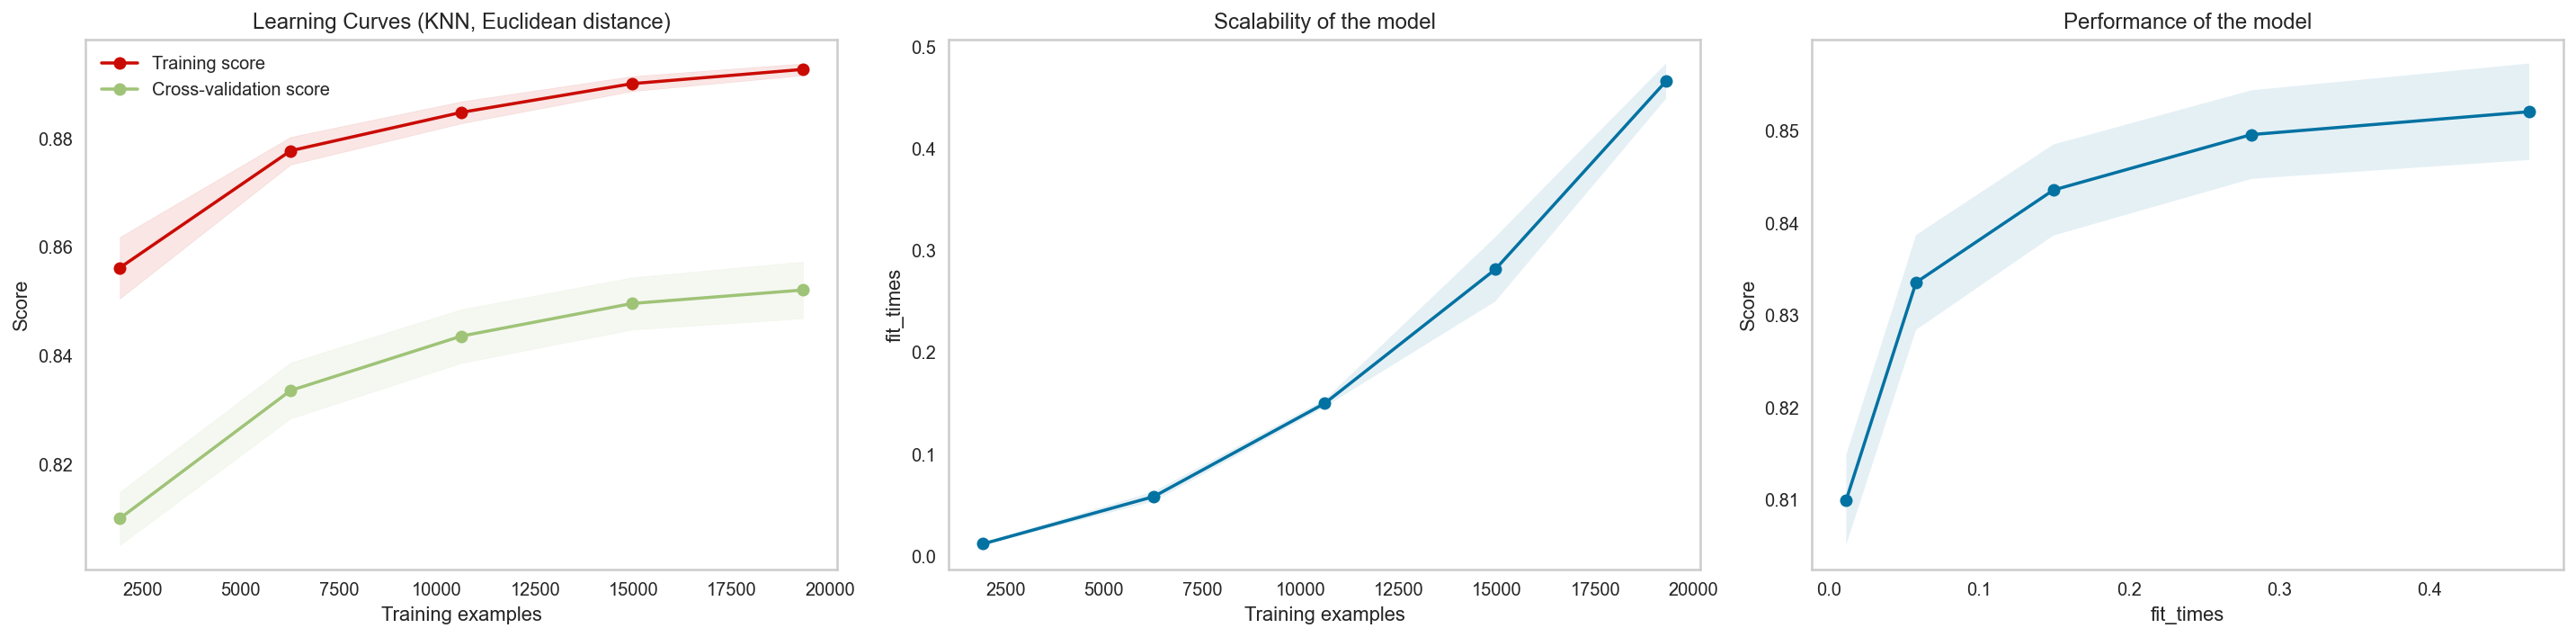

In [60]:
estimator = KNeighborsClassifier(weights= 'uniform', p= 1, n_neighbors= 15, leaf_size= 20)
estimator1 = KNeighborsClassifier(weights= 'uniform', p= 2, n_neighbors= 15, leaf_size= 20)

title = "Learning Curves (KNN, Manhattan distance)"
plot_learning_curve(estimator, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)
plt.tight_layout()

title = "Learning Curves (KNN, Euclidean distance)"
plot_learning_curve(estimator1, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)
plt.tight_layout()

plt.show()

In [64]:
classifier = KNeighborsClassifier(weights= 'uniform', p= 1, n_neighbors= 15, leaf_size= 20)


In [66]:
%%timeit

classifier.fit(X_train, y_train)



698 ms ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%%timeit
y_pred = classifier.predict(X_test)

2.61 s ± 61.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


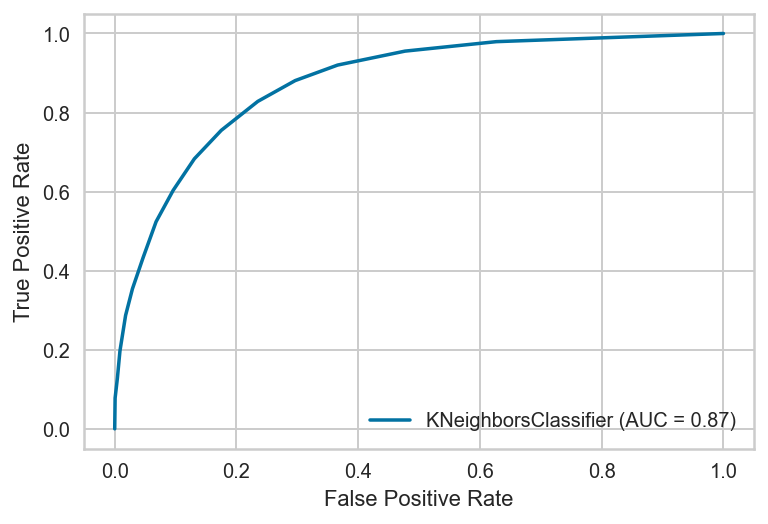

In [62]:
plot_roc_curve(classifier, X_test, y_test);

In [63]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

,precision,recall,f1-score,support
0,0.872975,0.903995,0.888214,4531.000000
1,0.675615,0.603196,0.637355,1502.000000
accuracy,0.829107,0.829107,0.829107,0.829107
macro avg,0.774295,0.753595,0.762785,6033.000000
weighted avg,0.823840,0.829107,0.825759,6033.000000
